## 1.自学seaborn库；
## 2.导入pandas，将boston.csv文件中的数据以DataFrame的形式赋值给变量df；
## 3. 打印df中各column的描述性统计；
## 4. 打印出df前十行和后十行的数据；
## 5. 自命名新的DataFrame变量（如：research），并将df中crime,rooms,ptratio,lstat和mv这五列数据赋值给新变量；
## 6.利用seaborn库的pariplot函数绘制新DataFrame的成对散点图；
## 7. 利用statesmodel.formula.api中的OLS函数拟合线性模型对mv（房屋单价）进行建模，并找到R-square最高，个数最少的解释变量组合；
## 8.利用所选解释变量组合和mv拟合出线性模型model，并打印出model.summary()
## 9.对最终模型的各统计指标进行解释

In [1]:
import pandas as pd
import matplotlib as plt

df = pd.read_csv('boston.csv')
df.describe()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.528854
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.182176
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [2]:
df.head(10)

,neighborhood,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,Nahant,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,Swampscott,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,Swanpscott,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,Marblehead,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,Marblehead,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
5,Marblehead,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7
6,Salem,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9
7,Salem,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,22.1
8,Salem,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5
9,Salem,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,17.10,18.9


In [3]:
df.tail(10)

,neighborhood,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
496,Revere,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391,19.2,21.14,19.7
497,Revere,0.26838,0.0,9.69,0,0.585,5.794,70.6,2.8927,6,391,19.2,14.10,18.3
498,Revere,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391,19.2,12.92,21.2
499,Revere,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,15.10,17.5
500,Revere,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391,19.2,14.33,16.8
501,Winthrop,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,Winthrop,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,Winthrop,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,Winthrop,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0
505,Winthrop,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,7.88,19.0


In [4]:
research = df.loc[:,['nox','rooms','age','rad','lstat','mv']]

In [5]:
import seaborn as sns

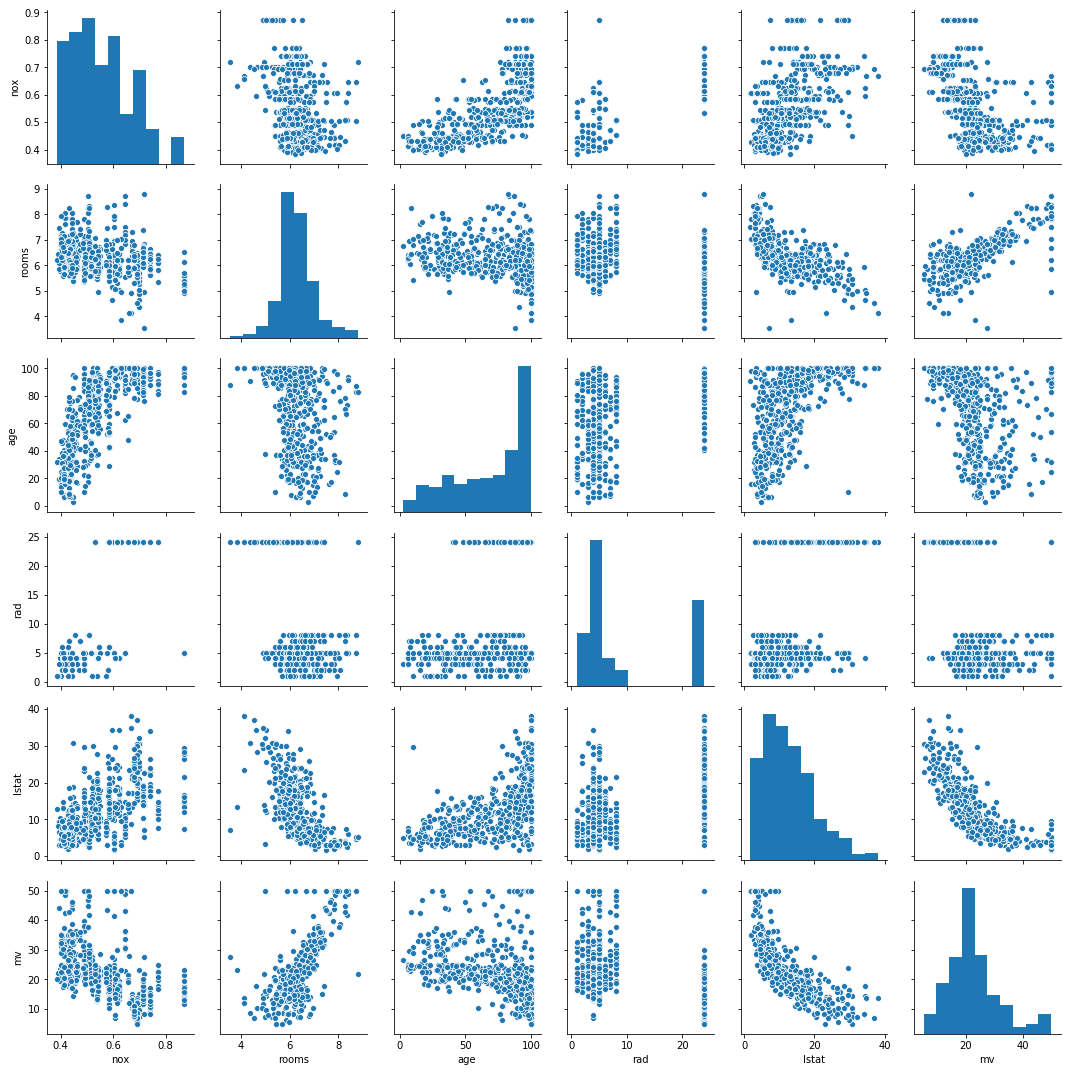

In [6]:
sns.pairplot(research)

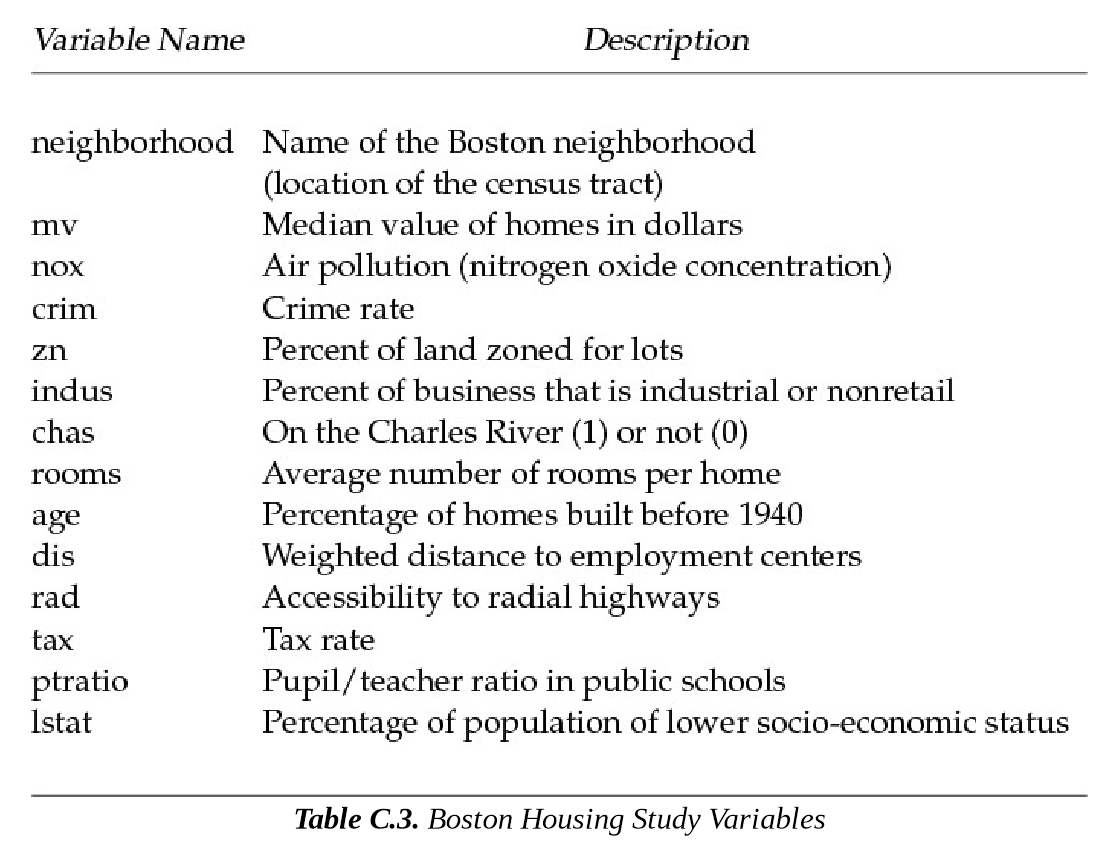

# Stepwise method

In [10]:
import statsmodels.formula.api as smf
df = pd.read_csv('boston.csv')
results = smf.ols('mv ~ neighborhood + zn + indus + chas + \
                  nox + rooms +  age + dis + rad + tax + \
                  ptratio +lstat ', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     mv   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     34.89
Date:                Tue, 09 Apr 2019   Prob (F-statistic):          4.79e-149
Time:                        10:42:48   Log-Likelihood:                -1272.5
No. Observations:                 506   AIC:                             2743.
Df Residuals:                     407   BIC:                             3161.
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        14.8070      2.106      7.031      0.000      10.667      18.947
neighborhood[T.Arlington]         1.6934      1.504      1.126      0.261      -1.263       4.650
neighborhood[T.Ashland]          -2.5544      2.502     -1.021      0.308      -7.473       2.364
neighborhood[T.Back_Bay]          9.8447      1.947      5.057      0.000       6.018      13.672
neighborhood[T.Beacon_Hill]      21.9382      2.448      8.963      0.000      17.127      26.750
neighborhood[T.Bedford]          -0.7702      2.368     -0.325      0.745      -5.424       3.884
neighborhood[T.Belmont]           9.2355      1.658      5.571      0.000       5.977      12.494
neighborhood[T.Beverly]          -3.9645      1.634     -2.426      0.016      -7.177      -0.752
neighborhood[T.Braintree]        -1.9321      1.210     -1.597      0.111      -4.310       0.446
neighborhood[T.Brookline]        10.8965      1.827      5.965      0.000       7.305      14.488
neighborhood[T.Burlington]       -4.8398      1.867     -2.593      0.010      -8.509      -1.170
neighborhood[T.Cambridge]         9.1173      1.318      6.918      0.000       6.527      11.708
neighborhood[T.Canton]           -3.7771      1.973     -1.914      0.056      -7.656       0.102
neighborhood[T.Charlestown]     -13.5126      2.004     -6.743      0.000     -17.452      -9.573
neighborhood[T.Chelsea]           1.7396      1.373      1.267      0.206      -0.960       4.439
neighborhood[T.Cohasset]          4.5820      3.322      1.379      0.169      -1.948      11.112
neighborhood[T.Concord]           1.5607      1.945      0.802      0.423      -2.264       5.385
neighborhood[T.Danvers]          -2.6222      1.923     -1.364      0.173      -6.402       1.157
neighborhood[T.Dedham]           -1.4409      1.602     -0.900      0.369      -4.589       1.708
neighborhood[T.Dorchester]       -5.8602      1.655     -3.540      0.000      -9.114      -2.606
neighborhood[T.Dover]            11.8771      3.395      3.499      0.001       5.204      18.550
neighborhood[T.Downtown]         -2.5593      2.004     -1.277      0.202      -6.498       1.380
neighborhood[T.Duxbury]           0.5833      3.903      0.149      0.881      -7.089       8.256
neighborhood[T.East_Boston]      -4.3452      1.771     -2.454      0.015      -7.826      -0.865
neighborhood[T.Everett]          -0.5735      1.345     -0.426      0.670      -3.217       2.070
neighborhood[T.Forest_Hills]     -7.5533      1.975     -3.824      0.000     -11.437      -3.670
neighborhood[T.Framingham]       -1.3451      1.682     -0.800      0.424      -4.651       1.960
neighborhood[T.Hamilton]         -1.2490      3.280     -0.381      0.704      -7.697       5.199
neighborhood[T.Hanover]          -4.9151     

In [12]:
results2 = smf.ols('mv ~ neighborhood + zn + nox + rooms + \
age + rad + tax + lstat', data=df).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     mv   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     35.34
Date:                Tue, 09 Apr 2019   Prob (F-statistic):          1.28e-149
Time:                        10:47:13   Log-Likelihood:                -1275.4
No. Observations:                 506   AIC:                             2745.
Df Residuals:                     409   BIC:                             3155.
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        12.5197      2.945      4.251      0.000       6.730      18.309
neighborhood[T.Arlington]         1.9271      1.273      1.514      0.131      -0.576       4.430
neighborhood[T.Ashland]          -3.5920      2.356     -1.525      0.128      -8.224       1.040
neighborhood[T.Back_Bay]         10.7072      1.893      5.658      0.000       6.987      14.427
neighborhood[T.Beacon_Hill]      22.9186      2.333      9.824      0.000      18.333      27.504
neighborhood[T.Bedford]          -0.1397      2.363     -0.059      0.953      -4.784       4.505
neighborhood[T.Belmont]           9.8572      1.257      7.843      0.000       7.387      12.328
neighborhood[T.Beverly]          -5.9714      1.406     -4.247      0.000      -8.735      -3.207
neighborhood[T.Braintree]        -2.5977      1.201     -2.162      0.031      -4.959      -0.236
neighborhood[T.Brookline]        12.6215      1.386      9.108      0.000       9.897      15.346
neighborhood[T.Burlington]       -5.1552      1.791     -2.879      0.004      -8.676      -1.635
neighborhood[T.Cambridge]        11.7098      1.230      9.521      0.000       9.292      14.128
neighborhood[T.Canton]           -3.8166      1.981     -1.927      0.055      -7.710       0.077
neighborhood[T.Charlestown]     -11.9625      1.875     -6.382      0.000     -15.647      -8.278
neighborhood[T.Chelsea]           5.4047      1.539      3.512      0.000       2.380       8.429
neighborhood[T.Cohasset]          3.0907      3.314      0.933      0.352      -3.424       9.605
neighborhood[T.Concord]           1.6273      1.937      0.840      0.401      -2.180       5.435
neighborhood[T.Danvers]          -4.0596      1.669     -2.432      0.015      -7.340      -0.779
neighborhood[T.Dedham]           -0.7855      1.499     -0.524      0.600      -3.732       2.161
neighborhood[T.Dorchester]       -5.5454      1.611     -3.443      0.001      -8.712      -2.379
neighborhood[T.Dover]            12.9993      3.274      3.971      0.000       6.564      19.435
neighborhood[T.Downtown]         -1.1195      1.892     -0.592      0.554      -4.838       2.599
neighborhood[T.Duxbury]          -2.4659      3.170     -0.778      0.437      -8.697       3.765
neighborhood[T.East_Boston]      -3.2364      1.699     -1.904      0.058      -6.577       0.104
neighborhood[T.Everett]           4.2542      1.467      2.900      0.004       1.370       7.138
neighborhood[T.Forest_Hills]     -6.7023      1.936     -3.461      0.001     -10.509      -2.896
neighborhood[T.Framingham]       -3.9717      1.156     -3.436      0.001      -6.244      -1.699
neighborhood[T.Hamilton]         -2.4678      3.264     -0.756      0.450      -8.883       3.948
neighborhood[T.Hanover]          -5.2598     

In [13]:
import numpy as np
results3 = smf.ols('mv ~ neighborhood + nox + rooms + \
age + rad + tax + lstat', data=df).fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     mv   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     35.34
Date:                Tue, 09 Apr 2019   Prob (F-statistic):          1.28e-149
Time:                        10:49:48   Log-Likelihood:                -1275.4
No. Observations:                 506   AIC:                             2745.
Df Residuals:                     409   BIC:                             3155.
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        12.5486      2.926      4.288      0.000       6.796      18.301
neighborhood[T.Arlington]         1.9050      1.310      1.454      0.147      -0.670       4.480
neighborhood[T.Ashland]          -3.5629      2.369     -1.504      0.133      -8.220       1.094
neighborhood[T.Back_Bay]         10.7072      1.893      5.658      0.000       6.987      14.427
neighborhood[T.Beacon_Hill]      22.9186      2.333      9.824      0.000      18.333      27.504
neighborhood[T.Bedford]          -0.1247      2.371     -0.053      0.958      -4.786       4.536
neighborhood[T.Belmont]           9.8324      1.322      7.437      0.000       7.233      12.431
neighborhood[T.Beverly]          -5.9731      1.407     -4.245      0.000      -8.739      -3.207
neighborhood[T.Braintree]        -2.6199      1.205     -2.173      0.030      -4.990      -0.250
neighborhood[T.Brookline]        12.6130      1.424      8.859      0.000       9.814      15.412
neighborhood[T.Burlington]       -5.1784      1.745     -2.968      0.003      -8.608      -1.749
neighborhood[T.Cambridge]        11.6881      1.355      8.625      0.000       9.024      14.352
neighborhood[T.Canton]           -3.8129      1.985     -1.920      0.055      -7.716       0.090
neighborhood[T.Charlestown]     -11.9625      1.875     -6.382      0.000     -15.647      -8.278
neighborhood[T.Chelsea]           5.3833      1.552      3.469      0.001       2.333       8.433
neighborhood[T.Cohasset]          3.0884      3.315      0.932      0.352      -3.428       9.605
neighborhood[T.Concord]           1.6575      1.947      0.851      0.395      -2.170       5.485
neighborhood[T.Danvers]          -4.0685      1.672     -2.433      0.015      -7.355      -0.782
neighborhood[T.Dedham]           -0.7963      1.511     -0.527      0.598      -3.766       2.174
neighborhood[T.Dorchester]       -5.5454      1.611     -3.443      0.001      -8.712      -2.379
neighborhood[T.Dover]            13.0348      3.333      3.911      0.000       6.483      19.586
neighborhood[T.Downtown]         -1.1195      1.892     -0.592      0.554      -4.838       2.599
neighborhood[T.Duxbury]          -2.4261      3.229     -0.751      0.453      -8.774       3.922
neighborhood[T.East_Boston]      -3.2364      1.699     -1.904      0.058      -6.577       0.104
neighborhood[T.Everett]           4.2283      1.582      2.673      0.008       1.119       7.338
neighborhood[T.Forest_Hills]     -6.7023      1.936     -3.461      0.001     -10.509      -2.896
neighborhood[T.Framingham]       -3.9763      1.147     -3.465      0.001      -6.232      -1.721
neighborhood[T.Hamilton]         -2.4341      3.309     -0.736      0.462      -8.939       4.071
neighborhood[T.Hanover]          -5.2238     

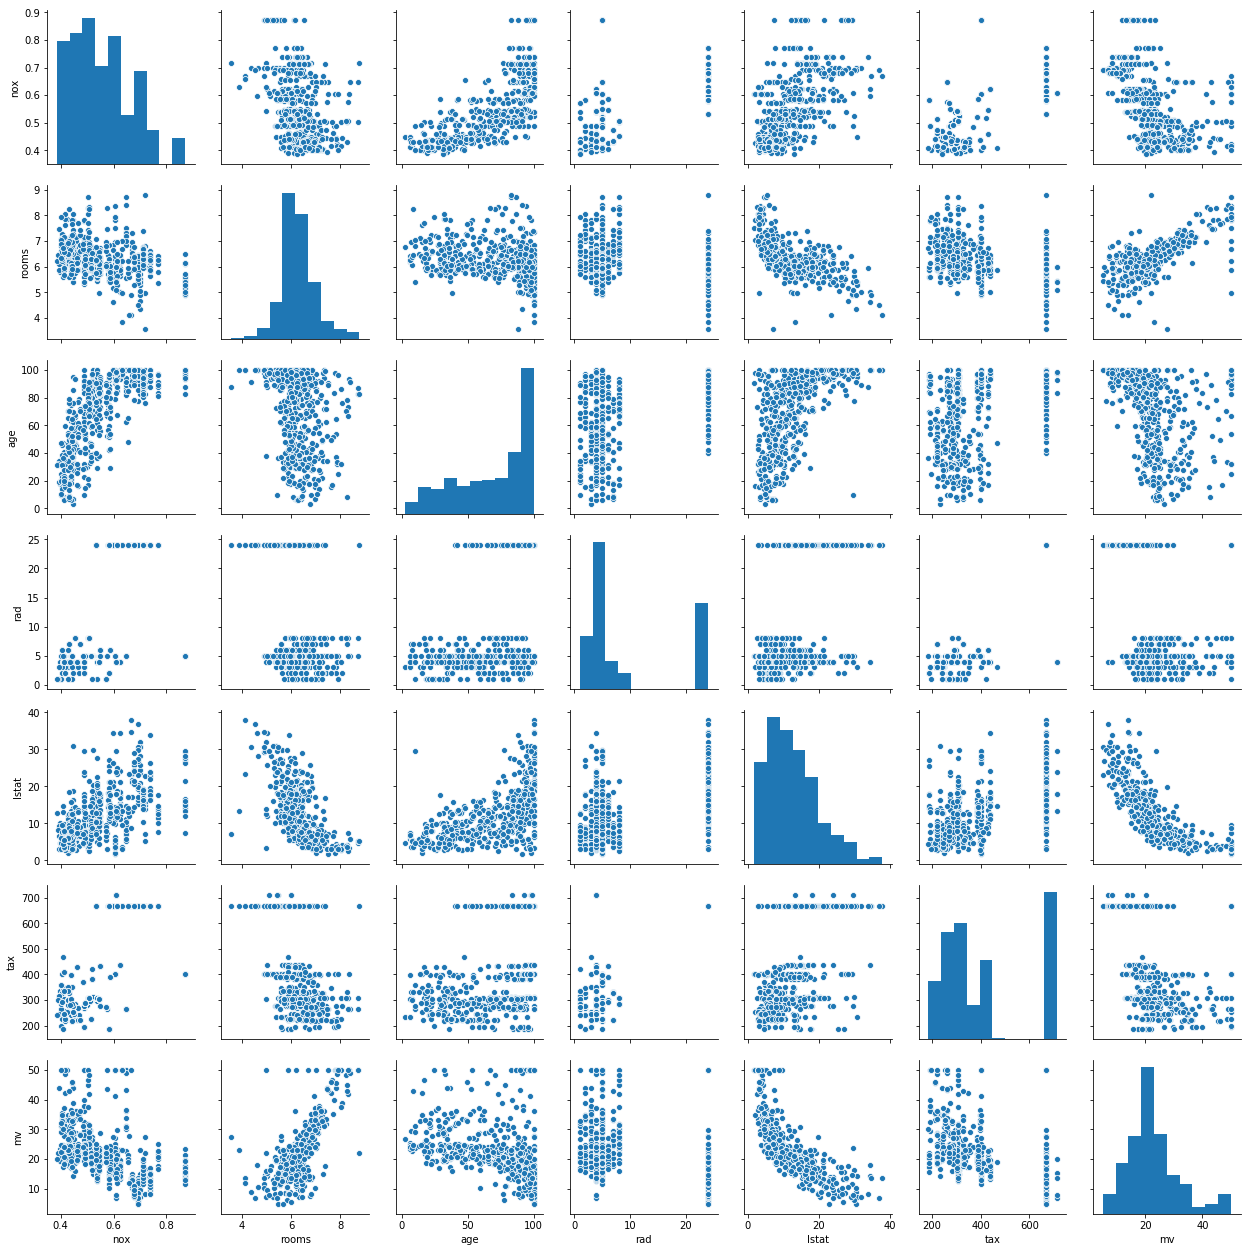

In [14]:
import seaborn as sns
research = df.loc[:,['nox','rooms','age','rad','lstat','tax','mv']]
sns.pairplot(research)

In [16]:
import numpy as np
results4 = smf.ols('mv ~ neighborhood + nox + rooms + \
age + rad  + np.log(lstat)', data=df).fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     mv   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     42.23
Date:                Tue, 09 Apr 2019   Prob (F-statistic):          1.62e-163
Time:                        11:21:11   Log-Likelihood:                -1234.8
No. Observations:                 506   AIC:                             2664.
Df Residuals:                     409   BIC:                             3074.
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        24.1413      3.386      7.131      0.000      17.486      30.797
neighborhood[T.Arlington]         2.0446      1.201      1.703      0.089      -0.315       4.405
neighborhood[T.Ashland]          -3.4145      2.185     -1.562      0.119      -7.710       0.881
neighborhood[T.Back_Bay]          7.9049      1.778      4.447      0.000       4.410      11.400
neighborhood[T.Beacon_Hill]      21.2814      2.161      9.849      0.000      17.034      25.529
neighborhood[T.Bedford]          -0.5213      2.187     -0.238      0.812      -4.820       3.778
neighborhood[T.Belmont]          10.5851      1.169      9.051      0.000       8.286      12.884
neighborhood[T.Beverly]          -3.8328      1.331     -2.880      0.004      -6.449      -1.217
neighborhood[T.Braintree]        -2.0886      1.109     -1.883      0.060      -4.268       0.091
neighborhood[T.Brookline]        12.9582      1.243     10.425      0.000      10.515      15.402
neighborhood[T.Burlington]       -3.8805      1.618     -2.399      0.017      -7.061      -0.700
neighborhood[T.Cambridge]         8.4786      1.362      6.223      0.000       5.800      11.157
neighborhood[T.Canton]           -1.8086      1.853     -0.976      0.330      -5.451       1.833
neighborhood[T.Charlestown]      -9.7845      1.729     -5.660      0.000     -13.183      -6.386
neighborhood[T.Chelsea]           0.3989      1.565      0.255      0.799      -2.677       3.475
neighborhood[T.Cohasset]          2.7424      3.066      0.894      0.372      -3.285       8.770
neighborhood[T.Concord]           2.0837      1.800      1.157      0.248      -1.455       5.623
neighborhood[T.Danvers]          -2.3589      1.557     -1.515      0.131      -5.420       0.702
neighborhood[T.Dedham]            1.0214      1.392      0.734      0.463      -1.714       3.757
neighborhood[T.Dorchester]       -4.1658      1.492     -2.792      0.005      -7.099      -1.232
neighborhood[T.Dover]            12.6897      3.083      4.116      0.000       6.629      18.750
neighborhood[T.Downtown]         -0.3993      1.726     -0.231      0.817      -3.792       2.993
neighborhood[T.Duxbury]          -1.6109      3.078     -0.523      0.601      -7.662       4.440
neighborhood[T.East_Boston]      -3.1527      1.524     -2.069      0.039      -6.149      -0.157
neighborhood[T.Everett]           5.3948      1.388      3.886      0.000       2.666       8.124
neighborhood[T.Forest_Hills]     -4.9010      1.785     -2.745      0.006      -8.411      -1.391
neighborhood[T.Framingham]       -2.8689      1.075     -2.668      0.008      -4.983      -0.755
neighborhood[T.Hamilton]         -3.1507      3.057     -1.031      0.303      -9.161       2.859
neighborhood[T.Hanover]          -5.1228     